# 支持向量机

## 实践1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
from sklearn import svm

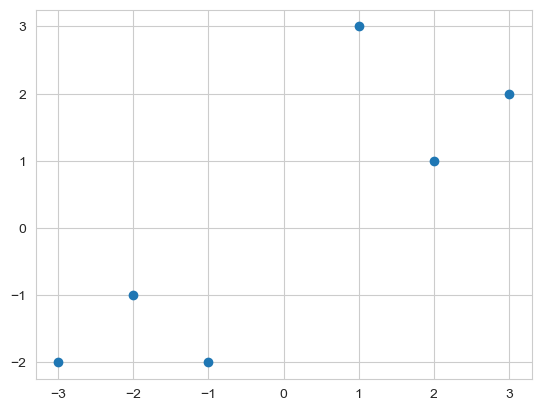

In [7]:
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

plt.figure()
plt.scatter(x_features[:, 0], x_features[:, 1])
plt.show()

the weight: [[0.33364706 0.33270588]]
the intercept [-0.00031373]
The predction result: [0 1 0]


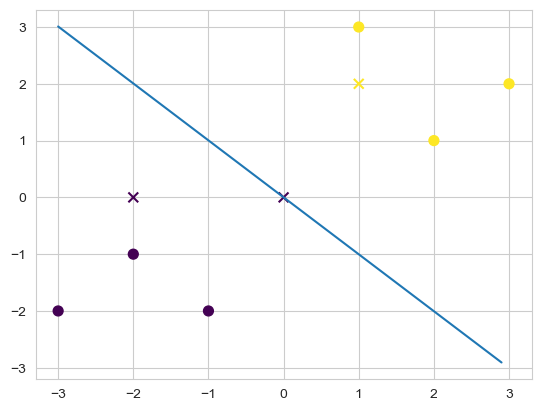

In [29]:
svc = svm.SVC(kernel='linear')
svc = svc.fit(x_features, y_label)
print('the weight:',svc.coef_)
print('the intercept',svc.intercept_)

x_features_new = np.array([[-2, 0], [1, 2], [0, 0]])
y_predict = svc.predict(x_features_new)
print('The predction result:',y_predict)


w = svc.coef_[0]
b = svc.intercept_

# w0x0 + w1x1 + b = 0
# w1x1 = - b - w0x0
# x1 = -b/w1 - w0x0/w1
x0 = np.arange(-3, 3, 0.1)
x1 = -b/w[1] - w[0]*x0/w[1]

plt.figure()
plt.plot(x0, x1)
plt.scatter(x_features[:,0], x_features[:,1], c=y_label, s=50,  cmap='viridis')
plt.scatter(x_features_new[:,0], x_features_new[:,1], c=y_predict, marker='x', s=50,  cmap='viridis')
plt.show()

# 实践2

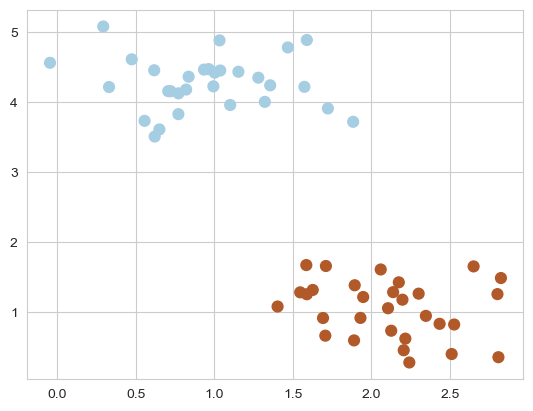

In [32]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
plt.show()

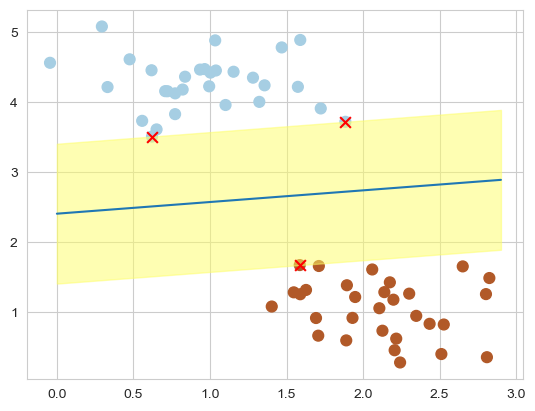

In [56]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_

x0 = np.arange(0, 3, 0.1)
x1 = -b/w[1] - w[0]*x0/w[1]

# y0 = ax0 + b  ==>  b = y0 - ax0
x1_down = - w[0]*x0/w[1] + clf.support_vectors_[0, 1] + w[0]*clf.support_vectors_[0, 0]/w[1]
x1_up = - w[0]*x0/w[1] + clf.support_vectors_[-1, 1] + w[0]*clf.support_vectors_[-1, 0]/w[1]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
plt.fill_between(x0, x1_down, x1_up, edgecolor='none', color='#fefe66', alpha=0.5)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r', marker='x', s=60)
plt.plot(x0, x1)
plt.show()

## 实践3

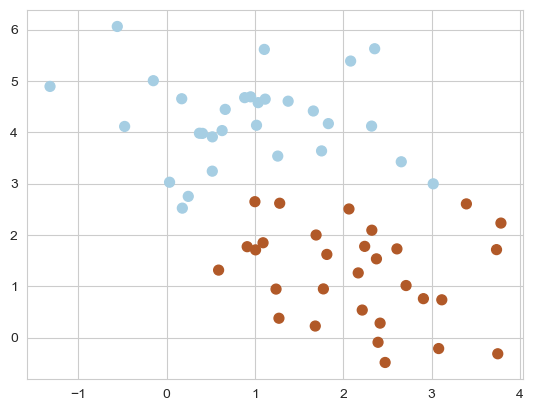

In [57]:
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

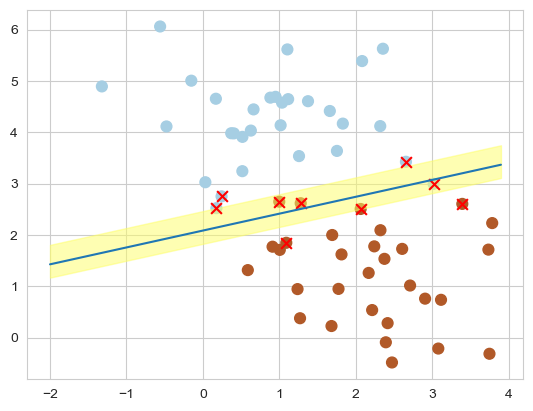

In [59]:
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_

x0 = np.arange(-2, 4, 0.1)
x1 = -b/w[1] - w[0]*x0/w[1]

# y0 = ax0 + b  ==>  b = y0 - ax0
x1_down = - w[0]*x0/w[1] + clf.support_vectors_[0, 1] + w[0]*clf.support_vectors_[0, 0]/w[1]
x1_up = - w[0]*x0/w[1] + clf.support_vectors_[-1, 1] + w[0]*clf.support_vectors_[-1, 0]/w[1]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
plt.fill_between(x0, x1_down, x1_up, edgecolor='none', color='#fefe66', alpha=0.5)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r', marker='x', s=60)
plt.plot(x0, x1)
plt.show()

## 实践4

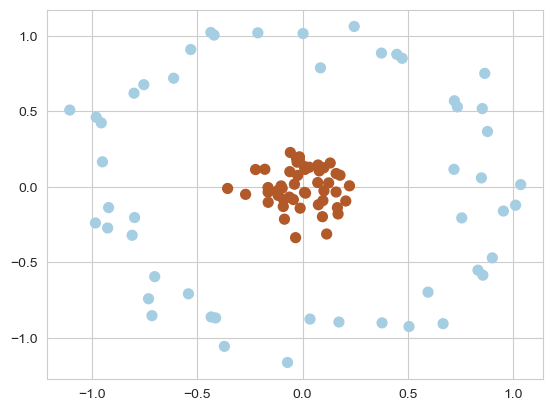

In [62]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

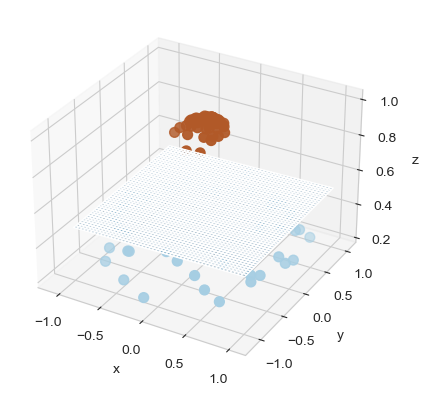

In [65]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_1, y_1 = np.meshgrid(np.linspace(-1, 1), np.linspace(-1, 1))
z =  0.01*x_1 + 0.01*y_1 + 0.5
ax.plot_surface(x_1, y_1, z, alpha=0.3)

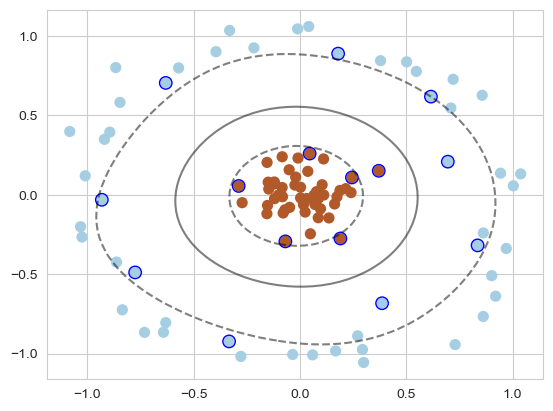

In [67]:
X, y = make_circles(100, factor=.1, noise=.1, random_state=7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)


ax = plt.gca()
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
x_1, y_1 = np.meshgrid(x, y)
P = np.zeros_like(x_1)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        P[i, j] = clf.decision_function(np.array([[xi, yj]]))
ax.contour(x_1, y_1, P, colors='k', levels=[-1, 0, 0.9], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none');